# Rodriguez, I. MIS 665, 16 SEP 2019
K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Table of Contents

</a></span></li><li><span><a href="#FINDINGS" data-toc-modified-id="FINDINGS"><span class="toc-item-num">1&nbsp;&nbsp;</span>FINDINGS. Executive Summary 
</a></span></li><li><span><a href="#APPENDIX:-I" data-toc-modified-id="APPENDIX:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>APPENDIX:-I Preparation and Transformation 
</a></span></li><li><span><a href="#APPENDIX:-II" data-toc-modified-id="APPENDIX:-II-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>APPENDIX:-II Analysis and Comparison of Alternative Dataframes    
</a></span></li><li><span><a href="#APPENDIX:-III" data-toc-modified-id="APPENDIX:-III-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>APPENDIX:-III Analysis of Budget and Profit
</a></span></li><li><span><a href="#APPENDIX:-IV" data-toc-modified-id="APPENDIX:-IV-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>APPENDIX:-IV Analysis of Categories
</a></span></li><li><span><a href="#REFERENCES" data-toc-modified-id="REFERENCES-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>REFERENCES</a></span></li></ul></div>

# APPENDIX:-I

# Preparation and Transformation

# Software Preparations

In [2]:
# load key data analysis packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# load scatter_matrix functionality
from pandas.plotting import scatter_matrix

# load  pingouin statistics functionality
import pingouin as pg

# load plotly visualization functionality
import plotly.graph_objects as go
import plotly.express as px

# load seaborn visualization functionality
import seaborn as sns

# Data Preparations


In [3]:
# load imdb dataset

# md = pd.read_csv("data/movie_metadata.csv")
md = pd.read_csv("https://raw.githubusercontent.com/irrodrig/finalProject/master/data/movie_metadata.csv")

In [4]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

# Data Transformation

Data Quality Issues
- The csv file had several major issues
- Some issues arouse during analysis requiring additional transformations

    - Remove null values
        - Fill null values with mean values for budget gross and duration
        - Drop 11 irrelevent columns
        - Drop 45 rows of duplicate records
        - Drop records with any remaining null values for director, language, content, or title data

    - Create DateTime type index set to years
        - Create copy of title_year column named 'year_index'
        - Set 'year_index' to datetime64 data type
        - Set 'year_index' as index


In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
md.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
md = md.fillna({'budget': int(md['budget'].mean())})
md = md.fillna({'gross': int(md['gross'].mean())})
md = md.fillna({'duration': int(md['duration'].mean())})
md = md.fillna({'num_critic_for_reviews': int(md['num_critic_for_reviews'].mean())})
md = md.fillna({'num_user_for_reviews': int(md['num_user_for_reviews'].mean())})

#facebook likes
md = md.fillna({'director_facebook_likes': int(md['director_facebook_likes'].mean())})
md = md.fillna({'actor_3_facebook_likes': int(md['actor_3_facebook_likes'].mean())})
md = md.fillna({'actor_1_facebook_likes': int(md['actor_1_facebook_likes'].mean())})
md = md.fillna({'actor_2_facebook_likes': int(md['actor_2_facebook_likes'].mean())})



In [8]:
md.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
# 11 columns dropped for irrelevance
md = md.drop('director_name', axis=1)
md = md.drop('actor_2_name', axis=1)
md = md.drop('actor_1_name', axis=1)
md = md.drop('actor_3_name', axis=1)
md = md.drop('plot_keywords', axis=1)
md = md.drop('aspect_ratio', axis=1)
md = md.drop('facenumber_in_poster', axis=1)
md = md.drop('color', axis=1)

In [10]:
md.isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                          0
genres                         0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [11]:
len(md)

5043

In [12]:
# count duplicate records
len(md[md.duplicated()])


45

In [13]:
# 45 duplicate records dropped

md = md.drop_duplicates()


In [14]:
len(md)

4998

In [15]:
# Drop records with missing information on director, language, content_rating, and title year

In [16]:
# The following cells drop any remaining records that are missing key biographical information
# The result is the primary dataframe, md, used for the bulk of the remaining analysis

m3 = md

In [17]:
m3=m3.dropna()

In [18]:
m3.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [19]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 0 to 5042
Data columns (total 20 columns):
num_critic_for_reviews       4626 non-null float64
duration                     4626 non-null float64
director_facebook_likes      4626 non-null float64
actor_3_facebook_likes       4626 non-null float64
actor_1_facebook_likes       4626 non-null float64
gross                        4626 non-null float64
genres                       4626 non-null object
movie_title                  4626 non-null object
num_voted_users              4626 non-null int64
cast_total_facebook_likes    4626 non-null int64
movie_imdb_link              4626 non-null object
num_user_for_reviews         4626 non-null float64
language                     4626 non-null object
country                      4626 non-null object
content_rating               4626 non-null object
budget                       4626 non-null float64
title_year                   4626 non-null float64
actor_2_facebook_likes       4626 no

In [20]:
# create year column for index

m3['year_index'] = m3['title_year'] 

C:\Users\ismae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 0 to 5042
Data columns (total 21 columns):
num_critic_for_reviews       4626 non-null float64
duration                     4626 non-null float64
director_facebook_likes      4626 non-null float64
actor_3_facebook_likes       4626 non-null float64
actor_1_facebook_likes       4626 non-null float64
gross                        4626 non-null float64
genres                       4626 non-null object
movie_title                  4626 non-null object
num_voted_users              4626 non-null int64
cast_total_facebook_likes    4626 non-null int64
movie_imdb_link              4626 non-null object
num_user_for_reviews         4626 non-null float64
language                     4626 non-null object
country                      4626 non-null object
content_rating               4626 non-null object
budget                       4626 non-null float64
title_year                   4626 non-null float64
actor_2_facebook_likes       4626 no

In [22]:
# adapted from https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime
# and https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
# From discussion after class between Professor Chae and another student

m3['year_index']= pd.to_datetime(m3['year_index'], format='%Y')

C:\Users\ismae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 0 to 5042
Data columns (total 21 columns):
num_critic_for_reviews       4626 non-null float64
duration                     4626 non-null float64
director_facebook_likes      4626 non-null float64
actor_3_facebook_likes       4626 non-null float64
actor_1_facebook_likes       4626 non-null float64
gross                        4626 non-null float64
genres                       4626 non-null object
movie_title                  4626 non-null object
num_voted_users              4626 non-null int64
cast_total_facebook_likes    4626 non-null int64
movie_imdb_link              4626 non-null object
num_user_for_reviews         4626 non-null float64
language                     4626 non-null object
country                      4626 non-null object
content_rating               4626 non-null object
budget                       4626 non-null float64
title_year                   4626 non-null float64
actor_2_facebook_likes       4626 no

In [24]:
m3.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,year_index
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,2009-01-01
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,2007-01-01


In [25]:
# reset index to year_index for time-series analysis

m3= m3.set_index('year_index')

# APPENDIX:-III  

# Analysis of Budget and Profit 

In [26]:
# budget and profit analysis impacted by ostensibly incorrect values over 2B.  

In [27]:
# profit analysis:  

In [28]:
m3['profit']=m3['gross']-m3['budget']

In [29]:
# The following cells review movies with budgets over 1B.  There is something skewing budget and profit results

loss = m3[(m3['budget'] > 1000000000)]

In [30]:
loss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 1997-01-01 to 2005-01-01
Data columns (total 21 columns):
num_critic_for_reviews       6 non-null float64
duration                     6 non-null float64
director_facebook_likes      6 non-null float64
actor_3_facebook_likes       6 non-null float64
actor_1_facebook_likes       6 non-null float64
gross                        6 non-null float64
genres                       6 non-null object
movie_title                  6 non-null object
num_voted_users              6 non-null int64
cast_total_facebook_likes    6 non-null int64
movie_imdb_link              6 non-null object
num_user_for_reviews         6 non-null float64
language                     6 non-null object
country                      6 non-null object
content_rating               6 non-null object
budget                       6 non-null float64
title_year                   6 non-null float64
actor_2_facebook_likes       6 non-null float64
imdb_score              

In [31]:
# These movies are the extreme budget outliers

loss.sort_values('budget').head(6)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
year_index,,,,,,,,,,,,,,,,,,,,,
1988-01-01,150.0,124.0,78.0,4.0,6.0,439162.0,Action|Animation|Sci-Fi,Akira,106160,28,...,430.0,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,0,-1.099561e+09
2004-01-01,105.0,103.0,78.0,101.0,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,Steamboy,13727,991,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,973,-2.127110e+09
1997-01-01,174.0,134.0,6000.0,745.0,893.0,2298191.0,Adventure|Animation|Fantasy,Princess Mononoke,221552,2710,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,11000,-2.397702e+09
2005-01-01,73.0,134.0,45.0,0.0,9.0,195888.0,Drama|Romance|War,Fateless,5603,11,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,607,-2.499804e+09
2005-01-01,202.0,112.0,0.0,38.0,717.0,211667.0,Crime|Drama,Lady Vengeance,53508,907,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,4000,-4.199788e+09
2006-01-01,363.0,110.0,584.0,74.0,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,The Host,68883,1173,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,7000,-1.221330e+10


In [32]:
# The following cells creates a new dataframe that removes extreme budget outliers
# This dataframe will be used only for visualization

m3 = m3[m3['budget']< 350000000]

In [33]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4614 entries, 2009-01-01 to 2004-01-01
Data columns (total 21 columns):
num_critic_for_reviews       4614 non-null float64
duration                     4614 non-null float64
director_facebook_likes      4614 non-null float64
actor_3_facebook_likes       4614 non-null float64
actor_1_facebook_likes       4614 non-null float64
gross                        4614 non-null float64
genres                       4614 non-null object
movie_title                  4614 non-null object
num_voted_users              4614 non-null int64
cast_total_facebook_likes    4614 non-null int64
movie_imdb_link              4614 non-null object
num_user_for_reviews         4614 non-null float64
language                     4614 non-null object
country                      4614 non-null object
content_rating               4614 non-null object
budget                       4614 non-null float64
title_year                   4614 non-null float64
actor_2_facebook_l

# APPENDIX:-IV

# Analysis of Categories

## Top Tier Analysis

In [34]:

# Foreign Film Analysis

# I referred to stackoverflow to properly format the following syntax, see https://stackoverflow.com/questions/11060506/is-there-a-not-equal-operator-in-python

m3['foreign_film']=m3['country']


In [35]:
m3 = m2[(m2['country']!='USA') & (m2['language']!='English')]

NameError: name 'm2' is not defined

## Foreign Film Categorical Analysis

The following cells create categories for foreign and US films:

In [ ]:
m3['origin'] = m3['country'].map({'%': 0, 'USA': 1})
m3 = m3.fillna({'origin': 0})
m3['origin'] = m3['origin'].map({0: 'Foreign', 1: 'American'})

In [ ]:
m3['origin_language'] = m3['language'].map({'%': 0, 'English': 1})
m3 = m3.fillna({'origin_language': 0})
m3['origin_language'] = m3['origin_language'].map({0: 'Foreign', 1: 'English'})

In [ ]:
m3['origin'].isnull().sum()

In [ ]:
m3['origin_language'].isnull().sum()

In [ ]:
m3.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)

## Quintessential Film Analysis

## Top Tier Movie Analysis

In [ ]:
m3.to_csv('data/movies3.csv')

# FINDINGS 

# Executive Summary



# Predicting Movie Success using the IMDB database

### Which factors best predict the success of movies within the IMDB database?

### IMDB Database
- Internet Movie Database came online in 1990
- A reference for users with movie details and user-generated rankings
- For details see https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1#


### Success: A movie's IMDB score

- 4626 Movies considered
- IMDB Score Statistics:  Median Score: 6.5 Max Score: 9.3 Min Score: 1.6
- IMDB Scores show more variance in recent years
- 18 Variables Considered in the Study: 10 numerical, 4 categorical, 3 biographical, 1 datetime index

The following chart depicts the range of IMDB scores:

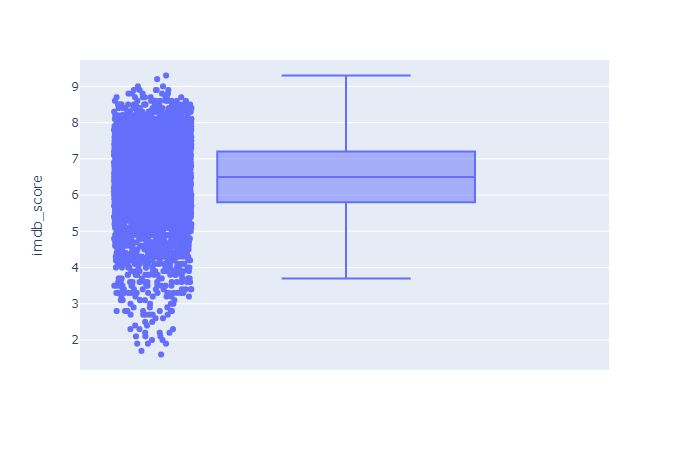

The following chart depicts IMDB scores over time, and by gross:  

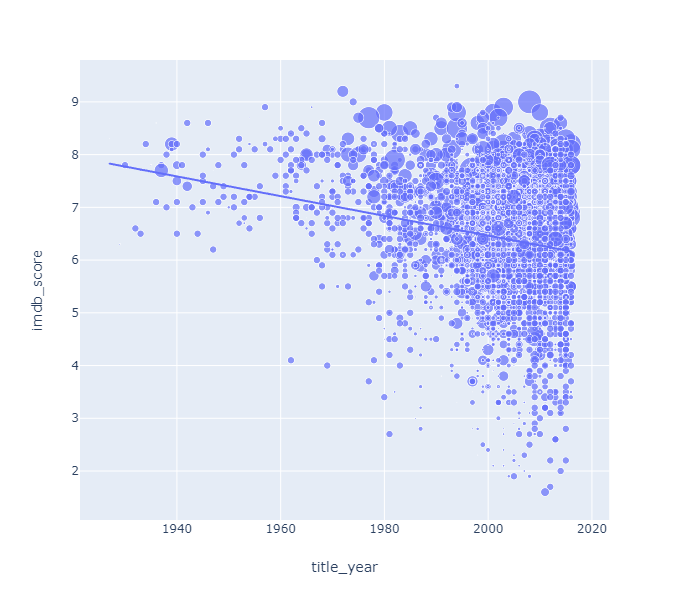

### Determining Success:  Two broad approaches

### Financial Approach 
- Conventional wisdom:  Movie success should align with financial success.
- IMDB collects key information on movie gross and movie budget, allowing for a basic calculation of profit
- After correcting for a small set of outliers:
    - Mean Gross: 49.16 Million
    - Mean Budget: 35.08 Million
    - Mean Profit: 14.09 Million

The following chart depicts the relationship between IMDB score and movie gross:

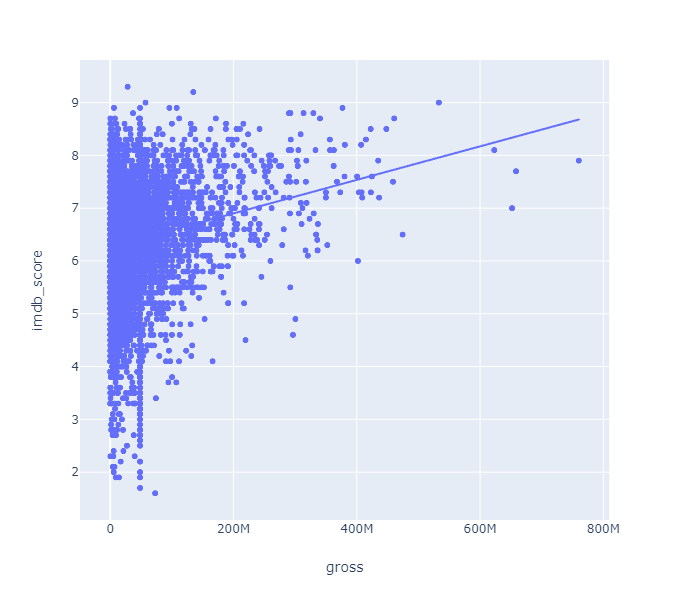

The following chart depicts the relationship between IMDB score and budget:

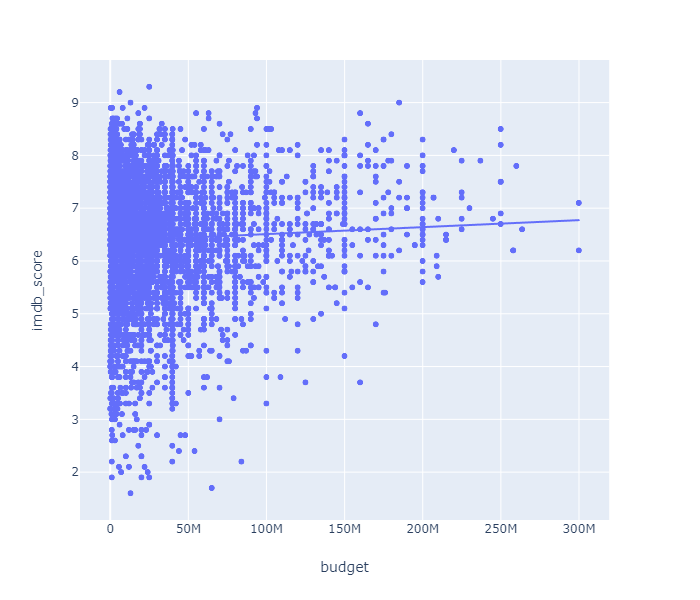

The following chart depicts the relationship between IMDB score and profit:

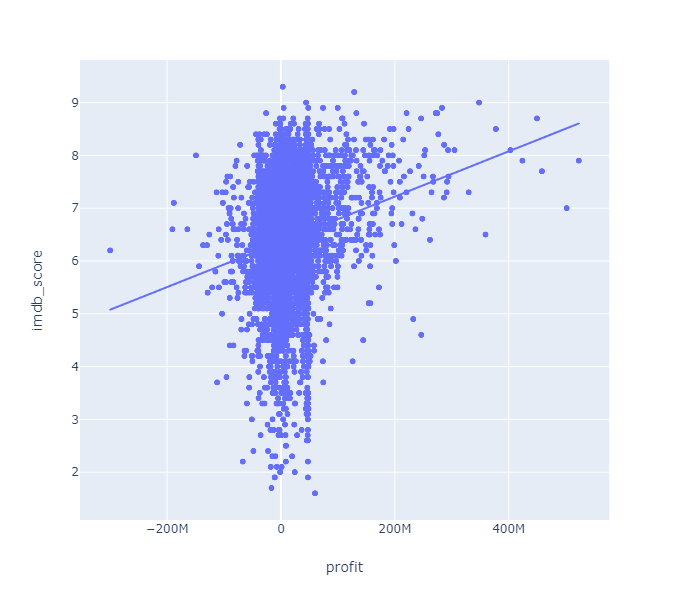

### Data Driven Approach
- Correlation of data reveals stronger relationships than those of financial considerations
- Top 3 Variables:  
    - num_voted_users 0.442
    - duration 0.361
    - num_critic_for_reviews 0.343
- Bottom 3 Variables
    - gross: 0.181
    - cast_total_facebook_likes: 0.101
    - budget: 0.030
- This suggests that movie success relates closely to the opinions of moviegoers

The following chart compares the relationships between the different variables in this study:

In [ ]:
# plot of correlations within the movie dataframe(m2)

plt.figure(figsize=(16,16))
sns.heatmap(m2.corr(),vmax=.8, square=True)

The following chart depicts the relationship between IMDB score and the number of voted users, the highest correlation:

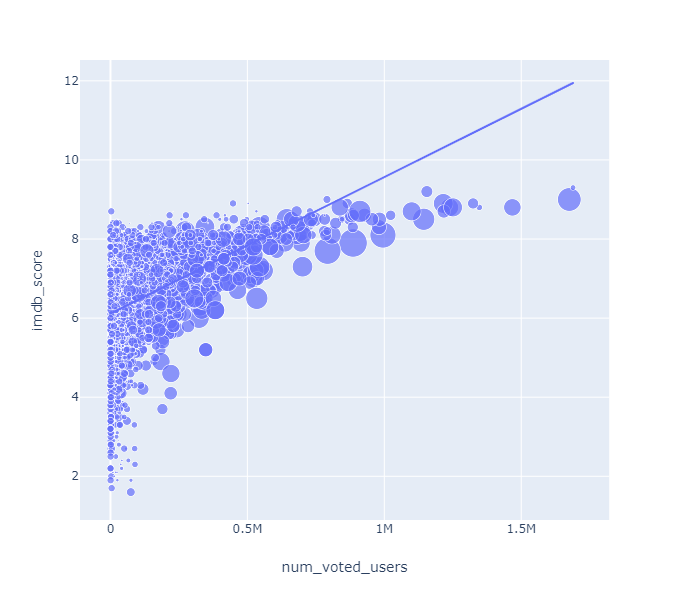

The following chart depicts the relationship between IMDB score and duration, the second highest correlation:

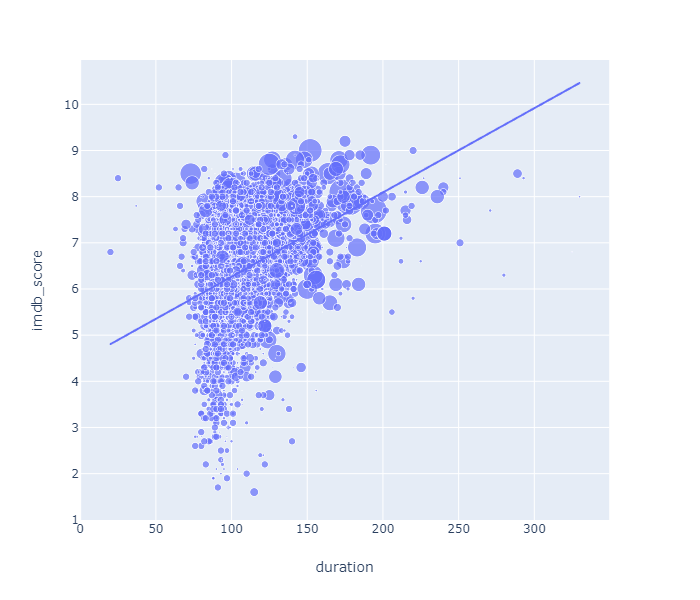

The following chart depicts the relationship between IMDB score and number critic for reviews, the third highest correlation:

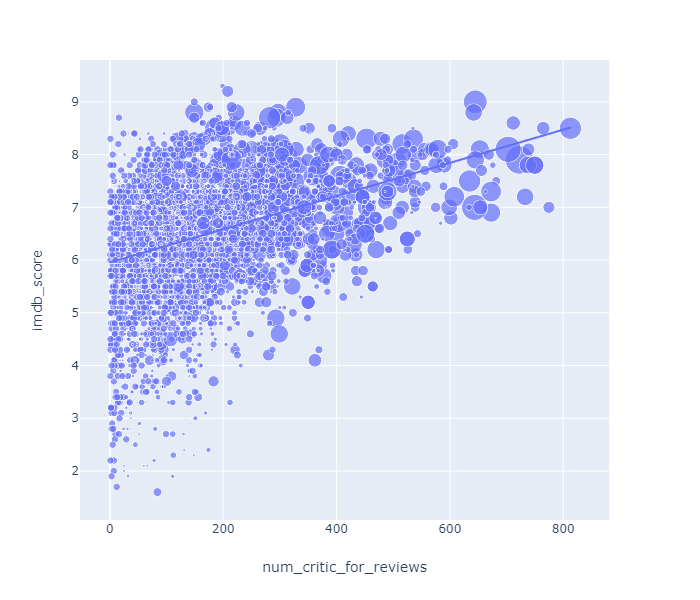

### In Short: The data-driven approach wins out

- Close correlation between IMDB scores and movie duration, and user-associated variables, such as the number of voted users
- Low correlation between IMDB scores and financial variables
- These findings form the basis for more advanced analysis of results

### Advanced Considerations. 
- The IMDB dataset reveals much more:
- The next step of this study considers segmentation of the IMDB database
- The following section will consider 3 segmentations of the database
    - Score quintiles
    - Movies originated the United States vs abroad
    - Movies in English vs. foreign languages
 
### Score Quintiles:  Segmentation of IMDB Scores into 5 Tiers
- Allows for a deep drill down into successful movies
- Each category ranges in size from 837 to 991
- Top Tier includes 894 movie titles

The following chart depicts the size of each IMDB score quintile:

In [ ]:
m2.groupby('imdb_score_quintiles')['movie_title'].count().plot(kind='barh')

The following chart depicts IMDB scores, divided by quintile and compared against the number of voted users:

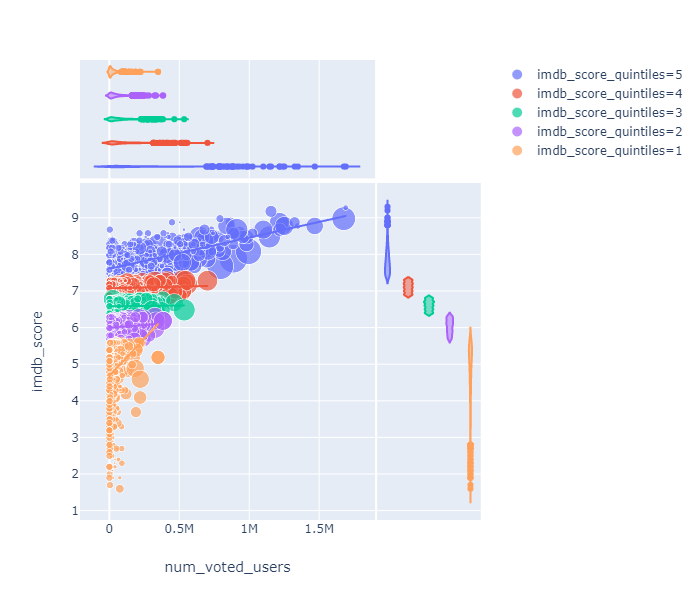


  ### Movie Origin:  Segmentation of movies into groups based on domestic or foreign production
  
 - Allows for comparison and contrast of American made movies vs. foreign made movies
 - 3560 American made movies
 - 1066 Foreign made movies
    
The following chart depicts IMDB score by origin location and compared with the number of voted users:

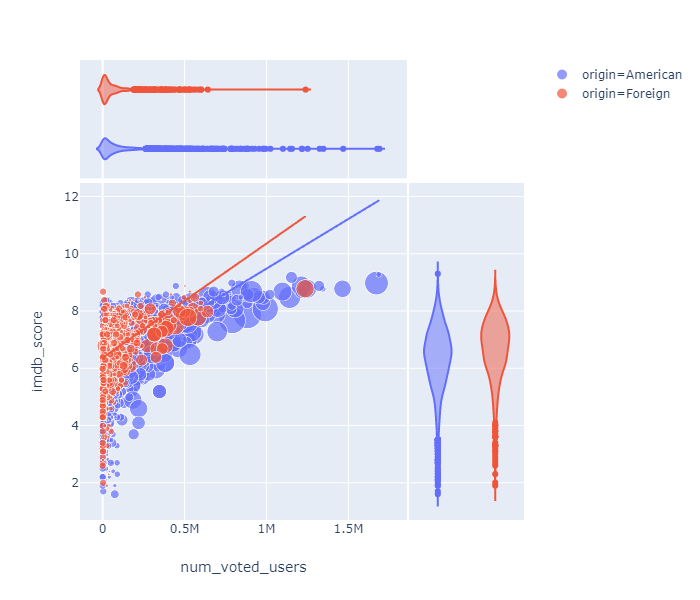

### Movie Language:  Segmentation of movies into groups based on English language and foreign language
- Allows for comparison and contrast of foreign language films
- 4389 English language films
- 237 Foreign language films

The following chart depicts IMDB score by language and compared with the number of voted users:

- There is a distinct difference in the profile of foeign language movies

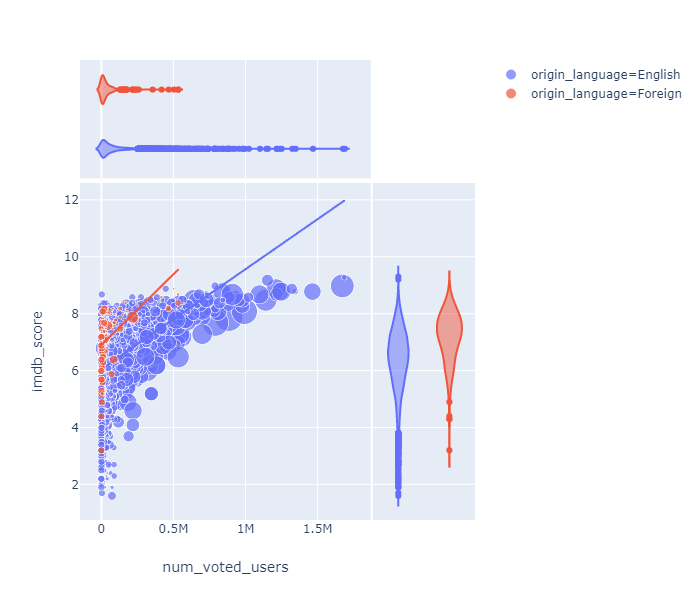

## Profile of top tier movies

- Consider only the top 20% of movies, by imdb score
- Only 894 total movies meet this criteria
- Correlations change significantly at this tier
- Top 5 Variables:  
  - num_voted_users 0.602
  - num_user_for_reviews: 0.439
  - num_critic_for_reviews 0.343
  - num_facebook_likes: 0.260
  - duration 0.231
  - gross: 0.211

The following chart depicts the relationship of variables for top tier(5th Quintile) movies:

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(m2Q.corr(),vmax=.8, square=True)

The following chart depicts the relationship of IMDB score by movie origin and compared with number of voted users:
- There is a distinct, but similar, shape in the profile of foreign vs American movies

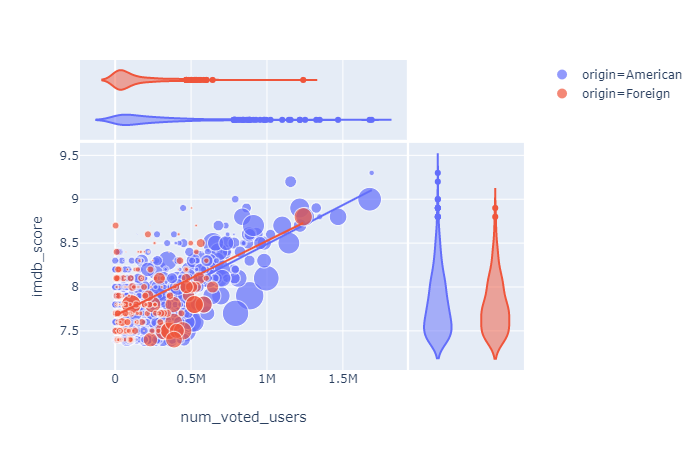

## Application of Analysis:

- Correlation and Segmentation Analysis form the basis for additional predictive insights
- While these insights alone will not predict success, these next two steps can answer two useful questions:
    - What does a good movie look like?
    - What movies are the very best of the best?
    - With additional modifications, correlation and segmentation could also form the basis for predictive modeling
  
## Quintessential Movies within this Tier: The Untouchables and The Fugitive

What top quintile movies are closest to the means for each of the two attributes most closely correlated with imdb score?

In other words, if a movie has traits similar to these, it will be successful.

- IMDB Score (mean = 7.8, corr=1): A score between 7.7 and 8.0
- Number of Voted Users(mean = 214,888, corr = 0.601 ): a total between 209k and 219k users
- Number User for Review (mean = 538, corr = 0.343): a total between 238 and 838 users
- Movie Facebook Likes (mean = 18557, corr = 0.262): not used as a filter.
- See Appendix 4 for details

The Untouchables (1987)

- Score: 7.9
- Number of Voted Users: 219008
- Number User for Review: 418
- Movie Facebook Likes: 0
- Duration: 119 

The Fugitive (1993)

- Score: 7.8
- Number of Voted Users: 219008
- Number User for Review: 270
- Movie Facebook Likes: 0
- Duration: 123

## Profile of the very best movies

What are the very best movies, using the attributes most closely correlated with IMDB score? 

In other words, if a movie is on this list, it will be successful.

- Consider only those top-tier movies, above the average calculated variables
   - IMDB Score (mean = 7.8, corr=1): A score above 7.8
   - Number of Voted Users(mean = 214,888, corr = 0.601 ): a total above 214,888
   - Number User for Review (mean = 538, corr = 0.343): a total above 538
   - Movie Facebook Likes (mean = 18557, corr = 0.262): a total above 18557
- Only 102 movies meet this criteria
- 16.7 % of movies were foreign produced.  Lower than the broader dataframe
- 5.9% of movies were foreign language. Similar to broader dataframe
- See Appendix 4 for details

The following chart depicts the top tier of IMDB scores by origin and compared with the number of voted users:

- There is a distinct difference in the profiles of foreign-made movies
- Recommend further analysis to determine the characteristics of foreign-made movies before making any investment decisions

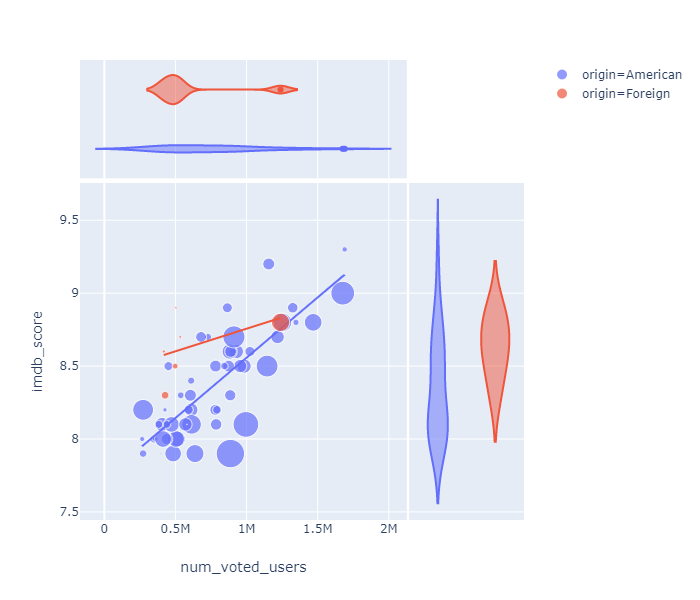

The following chart depicts the top tier of IMDB scores by language and compared with the number of voted users:

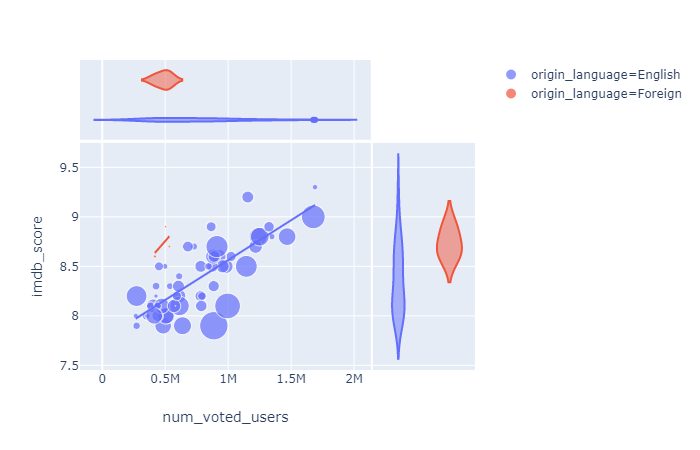

# REFERENCES

github.io, pandas qcut. http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.qcut.html?highlight=qcut#pandas.qcut

ibm.com, Markdown for Jupyter Notebook Cheatsheet. https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

imdb.com, What is IMDB. https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1# 

stackoverflow.com, Convert pandas column to dateline. https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

stackoverflow.com, Is there a not equal operator in python. https://stackoverflow.com/questions/11060506/is-there-a-not-equal-operator-in-python

stackoverflow.com, Pandas convert column with year integer to datetime. https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime 


stackoverflow.com, What is the difference between pandas qcut and pandas cut. https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

sebastianrascka.com, ipython internal links.  https://sebastianraschka.com/Articles/2014_ipython_internal_links.html

